# 2.  Incomplete, Positive-Only Labels
In this problem we will consider training binary classifiers in situations where we do not have full access to the labels. In particular, we consider a scenario, which is not too infrequent in real life, where we have labels only for a subset of the positive examples. All the negative examples and the rest of the positive examples are unlabelled.

That is, we assume a dataset $\{(x^{(i)}, t^{(i)}, y^{(i)})\}_{i=1}^{m}$, where $t^{(i)}\in\{0,1\}$ is the “true” label, and where

\begin{align*}
y^{(i)} = \left\{
\begin{array}{ll}
1 & x^{(i)} {\rm\ is\ labeled}\\
0 & {\rm\ otherwise.}
\end{array}\right.
\end{align*}

All labeled examples are positive, which is to say $p(t^{(i)} =1| y^{(i)}=1)=1$, but unlabeled examples may be positive or negative. Our goal in the problem is to construct a binary classifier $h$ of the true label $t$, with only access to the partial labels $y$. In other words, we want to construct $h$ such that $h(x^{(i)})\approx p(t^{(i)} =1| x^{(i)})$ as closely as possible, using only $x$ and $y$.

<b>(a)</b> [5 points] Suppose that each $y^{(i)}$ and $x^{(i)}$ are conditionally independent given $t^{(i)}$: 
\begin{align*}
p(y^{(i)} =1| t^{(i)}=1, x^{(i)})=p(y^{(i)} =1| t^{(i)}=1) 
\end{align*}

Note this is equivalent to saying that labeled examples were selected uniformly at random from the set of positive examples. Prove that the probability of an example being labeled differs by a constant factor from the probability of an example being positive. That is, show that $p(t^{(i)} =1| x^{(i)})=\frac{1}{\alpha}p(y^{(i)} =1| x^{(i)})$  for some $\alpha\in \mathbb{R}$.
### Answer:

\begin{align*}
    p(y^{(i)} =1| x^{(i)}) 
    & = p(y^{(i)} =1, t^{(i)} =0| x^{(i)}) + p(y^{(i)} =1, t^{(i)} =1| x^{(i)})\\
    & = 0 + p(y^{(i)} =1| t^{(i)} =1, x^{(i)}) p(t^{(i)} =1| x^{(i)})\\
    & = p(y^{(i)} =1| t^{(i)} =1) p(t^{(i)} =1| x^{(i)}).
    \end{align*}
Therefore, 

\begin{align*}
p(y^{(i)} =1| x^{(i)}) = \alpha p(t^{(i)} =1| x^{(i)})
\end{align*}

where $ \alpha = p(t^{(i)} =1| x^{(i)}).$

<b>(b)</b> [5points] Suppose we want to estimate $\alpha$ using a trained classifier $h$ and a held-out validation set $V$ . Let $V_+$ be the set of labeled (and hence positive) examples in $V$, given by $V_+ = \{x^{(i)}\in V| y^{(i)} = 1\}$. Assuming that $h(x^{(i)}) \approx p(y^{(i)} = 1| x^{(i)})$ for all examples $x^{(i)}$, show that


\begin{align*}
h(x^{(i)}) \approx \alpha{\rm\ for\ all\ }x^{(i)} \in V_{+}.
\end{align*}


You may assume that $p(t^{(i)} = 1| x^{(i)}) \approx 1$ when $x^{(i)} \in V_+$. 

### Answer:  
We may assume that for $x\in V_+$, we have $p(t=1|x) \approx 1$.
Therefore,
\begin{align*}
h(x^{(i)}) 
& \approx p(y^{(i)} =1| x^{(i)})\\
& = \alpha p(t^{(i)} =1| x^{(i)})\\
& = \alpha.
\end{align*}  

<b>(c)</b> [5 points] <b>Coding problem.</b> 
The following three problems will deal with a dataset which we have provided in the following files:
`data/ds3_{train,valid,test}.csv`

Each file contains the following columns: $x_1, x_2, y$, and $t$. As in Problem 1, there is one example per row.
First we will consider the ideal case, where we have access to the true $t$-labels for training. In `src/p02cde_posonly`, write a logistic regression classifier that uses $x_1$ and $x_2$ as input features, and train it using the $t$-labels (you can ignore the $y$ labels for this part). Output the trained model’s predictions on the test set to the file specified in the code.
### Answer: 

In [1]:
import numpy as np
import src.util as util
from src.linear_model import LinearModel

import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [3]:
def g(theta, x):
    """
    input:
    theta: parameter, shape: (n,)
    x: whole examples, shape: (m, n)

    output:
    sigmoid of examples, shape: (m,)

    """
    return 1 / (1 + np.exp(-x @ theta))


def dJ(theta, x, y):
    """
    input:
    theta parameter, shape: (n,)
    x: whole examples, shape: (m, n)

    output:
    gradiant of J(theta), shape:(n,)

    """
    m, _ = x.shape  # number of datas
    return 1 / m * x.T @ (g(theta, x) - y)


def HJ(theta, x):
    """
    input:
    theta parameter, shape: (n,)
    x: whole examples, shape: (m, n)

    output:
    Hessian of J(theta), shape:(n,n)

    """
    m, _ = x.shape
    Z = g(theta, x)
    Z = Z * (1 - Z)  # (m,)
    return 1 / m * Z * x.T @ x


def dist(x, y):
    return np.sum(np.abs(x - y))


class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """

        _, n = x.shape
        if self.theta is None:
            self.theta = np.zeros(n)

        # *** START CODE HERE ***
        for _ in range(self.max_iter):
            theta_new = self.theta - np.linalg.inv(HJ(self.theta, x)) @ dJ(
                self.theta, x, y
            )
            self.theta = theta_new
            if dist(theta_new, self.theta) < self.eps:
                break

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return x @ self.theta >= 0
        # *** END CODE HERE ***

In [4]:
train_path = 'data/ds3_train.csv'
valid_path = 'data/ds3_valid.csv'
test_path = 'data/ds3_test.csv'



# data sets ready for use in logistic regression 
x_train, t_train = util.load_dataset(train_path, label_col='t',  add_intercept=True)
x_valid, t_valid = util.load_dataset(valid_path, label_col='t',  add_intercept=True)
x_test, t_test = util.load_dataset(test_path, label_col='t',  add_intercept=True)

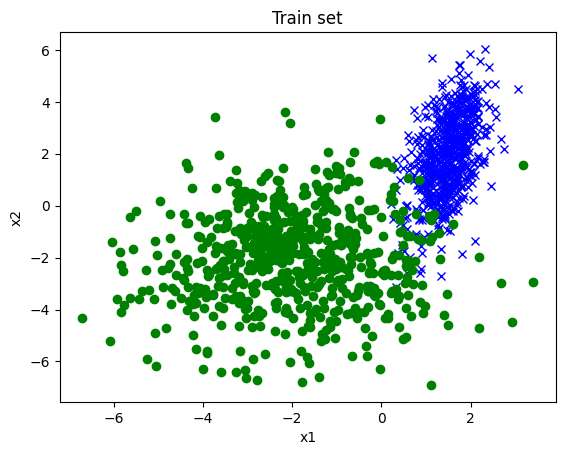

In [5]:
util.plot(x_train, t_train, title = "Train set")

In [7]:
lg1 = LogisticRegression()
lg1.fit(x_train, t_train)

Theta:  [-0.9711418   2.73208784  1.07403478]
Training accuracy:  0.9632
Validation accuracy:  0.9596774193548387
Test accuracy:  0.9838709677419355


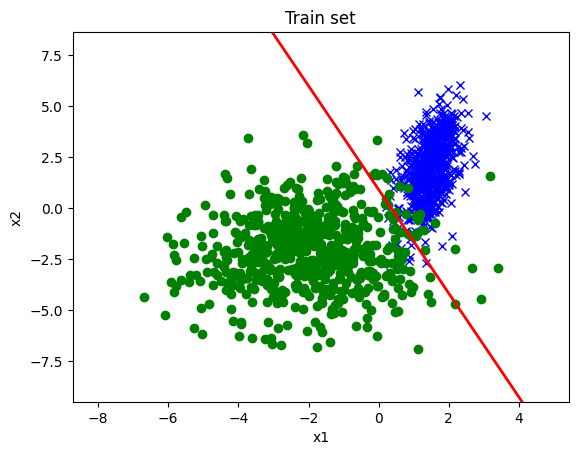

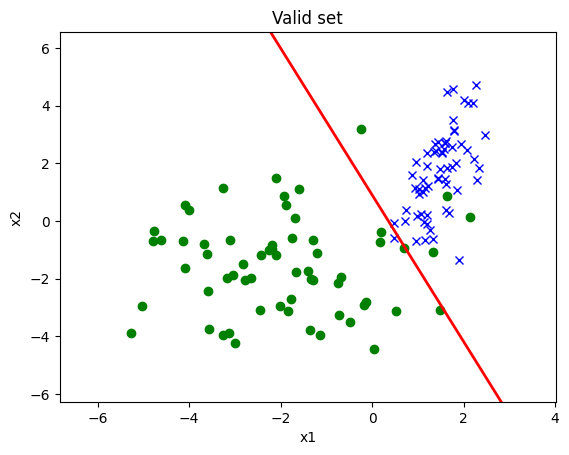

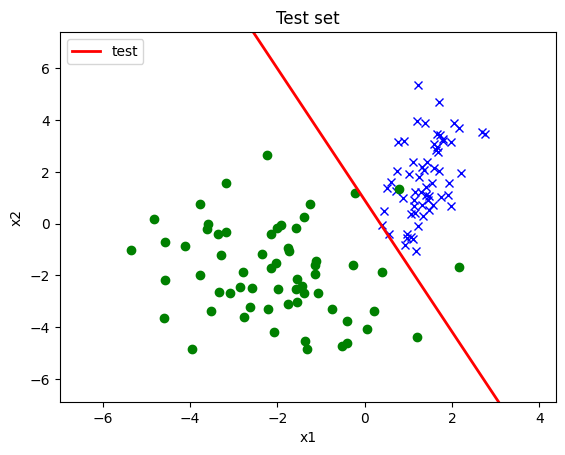

In [8]:
util.plot(x_train, t_train, theta=lg1.theta, title = 'Train set')
print("Theta: ", lg1.theta)
print("Training accuracy: ", np.mean(lg1.predict(x_train) == t_train))


util.plot(x_valid, t_valid, theta=lg1.theta, title = 'Valid set')
print("Validation accuracy: ", np.mean(lg1.predict(x_valid) == t_valid))


util.plot(x_test, t_test, theta=lg1.theta, label_1 = "test", title = 'Test set')
print("Test accuracy: ", np.mean(lg1.predict(x_test) == t_test))

<b>(d)</b> [5 points] <b>Coding problem.</b> We now consider the case where the $t$-labels are unavailable, so you only have access to the $y$-labels at training time. Add to your code in `p02cde_posonly.py` to re-train the classifier (still using $x_1$ and $x_2$ as input features), but using the $y$_labels only.
### Answer: 

In [9]:
train_path = 'data/ds3_train.csv'
valid_path = 'data/ds3_valid.csv'
test_path = 'data/ds3_test.csv'



# data sets ready for use in logistic regression 
x_train, y_train = util.load_dataset(train_path, label_col='y',  add_intercept=True)
x_valid, y_valid = util.load_dataset(valid_path, label_col='y',  add_intercept=True)
x_test, y_test = util.load_dataset(test_path, label_col='y',  add_intercept=True)

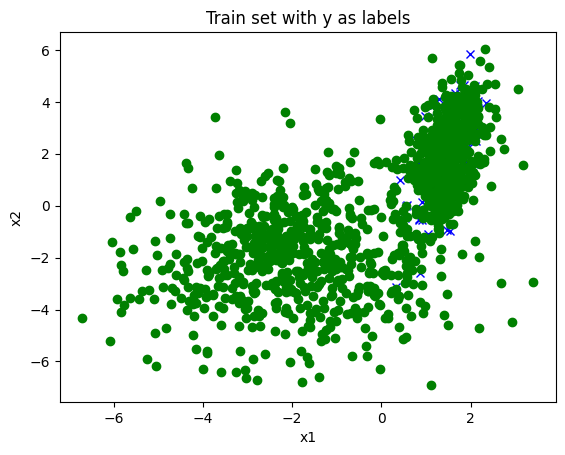

In [10]:
util.plot(x_train, y_train, title = "Train set with y as labels")

In [11]:
lg2 = LogisticRegression()
lg2.fit(x_train, y_train)

Theta:  [-0.9711418   2.73208784  1.07403478]
Training accuracy:  0.5888
Validation accuracy:  0.5725806451612904
Test accuracy:  0.5967741935483871


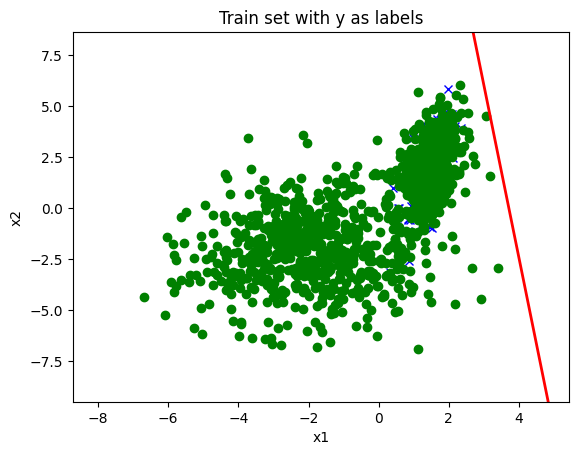

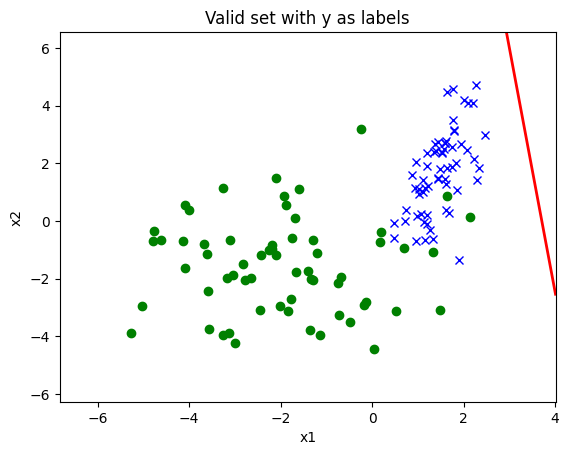

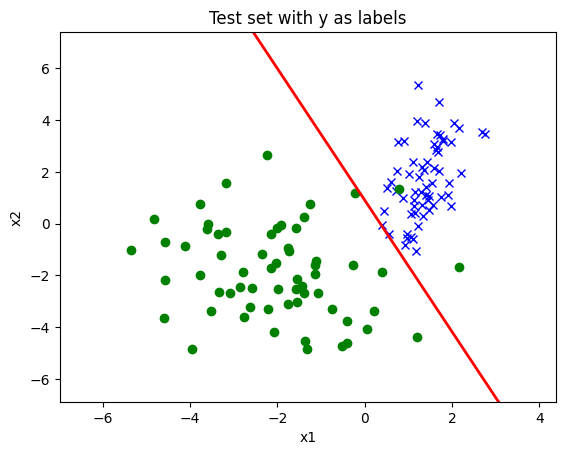

In [12]:
util.plot(x_train, y_train, theta=lg2.theta, title = 'Train set with y as labels')
print("Theta: ", lg1.theta)
print("Training accuracy: ", np.mean(lg1.predict(x_train) == y_train))


util.plot(x_valid, t_valid, theta=lg2.theta, title = 'Valid set with y as labels')
print("Validation accuracy: ", np.mean(lg1.predict(x_valid) == y_valid))


util.plot(x_test, t_test, theta=lg1.theta, label_2 = "test", title = 'Test set with y as labels')
print("Test accuracy: ", np.mean(lg1.predict(x_test) == y_test))

<b>(e)</b> [10 points] <b>Coding problem.</b> Using the validation set, estimate the constant $\alpha$ by averaging your classifier’s predictions over all labeled examples in the validation set: 
$$\alpha\approx \frac{1}{|V_+|}\sum_{x^{(i)}\in V_+}h(x^{(i)}).$$

Add code in `src/p02cde_posonly.py` to rescale your classifier's predictions from part $(d)$ using the estimated value for $\alpha$.

Using the equality 
    \begin{align*}p(y =1| x) = \alpha p(t =1| x),\end{align*}
we have
    \begin{align*}\sum_{x\in V_+}p(y=1| x) = \alpha\sum_{x\in V_+} p(t=1| x).\end{align*}
Now, by the assumption $p(t=1| x)\approx 1$ for each $x\in V_+$, 
    \begin{align*}\sum_{x\in V_+}h(x) = \alpha\sum_{x\in V_+}1,\end{align*}
which concludes 
    \begin{align*}\alpha = \frac{1}{|V_+|}\sum_{x\in V_+}h(x).\end{align*}


Finally, using a threshold of $p(t^{(i)} = 1|x(i)) = 0.5$, make three separate plots with the
decision boundaries from parts (c) - (e) plotted on top of the test set. Plot $x_1$ on the horizontal axis and $x_2$ on the vertical axis, and use two different symbols for the positive ($t^{(i)} = 1$) and negative ($t^{(i)}= 0$) examples. In each plot, indicate the separating hyperplane with a red line. 




### Answer: 
<b>Remark:</b> We saw that the true probability $p(t| x)$ was only a constant factor away from $p(y| x)$. This means, if our task is to only rank examples (i.e. sort them) in a particular order (e.g, sort the proteins in order of being most likely to be involved in transmitting signals across membranes), then in fact we do not even need to estimate $\alpha$. The rank based on $p(y| x)$ will agree with the rank based on $p(t| x)$.

Simplifying the equality $p(t^{(i)}= 1|x(i))= 0.5$, we have
\begin{align*}
p(t=1|x) 
&= \frac{p(y=1)}{\alpha}\\
&\approx \frac{h(x)}{\alpha}\\
&=\frac{1}{\alpha(1+e^{-\theta x})}\\
& = 0.5
\end{align*}
and consequently, the threshold would be

\begin{align*}\theta x = -\ln(\frac{2}{\alpha}-1).\end{align*}
Since $x_{0}=1$, if we define $\theta'$ such that $\theta_i'=\theta_i$ for each $i\neq 0$ and 
$\theta'_{0} = \theta_{0}+\ln(\frac{2}{\alpha}-1)$, this threshold can be written as 
\begin{align*}\theta' x = 0.\end{align*}
    
Lets compute $\alpha$ and $\theta'$:

In [13]:
Z = x_train[y_train==1]
alpha = g(lg2.theta,Z).mean()
alpha

0.17692378501880154

In [14]:
theta_new = lg2.theta.copy()
theta_new[0] = theta_new[0] + np.log(2/alpha -1)

Theta:  [-0.9711418   2.73208784  1.07403478]
Training accuracy:  0.9624
Validation accuracy:  0.9435483870967742
Test accuracy:  0.9516129032258065


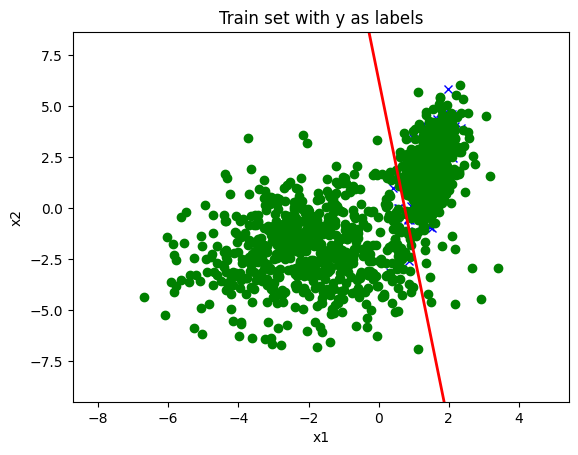

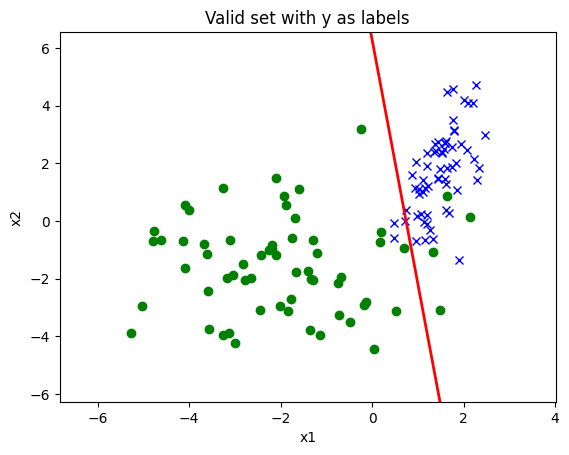

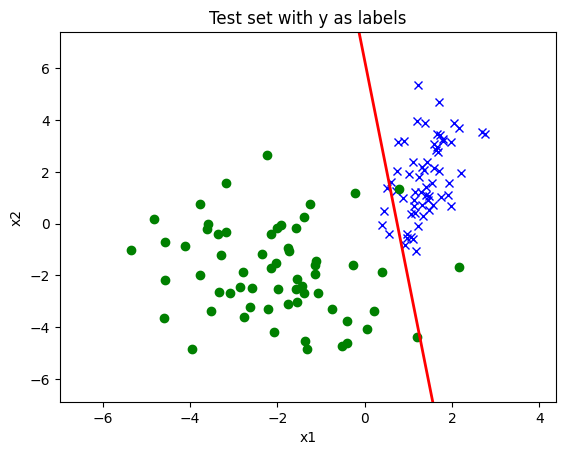

In [15]:
util.plot(x_train, y_train, theta=theta_new, title = 'Train set with y as labels')
print("Theta: ", lg1.theta)
print("Training accuracy: ", np.mean((x_train@theta_new>=0) == t_train))

util.plot(x_valid, t_valid, theta=theta_new, title = 'Valid set with y as labels')
print("Validation accuracy: ", np.mean((x_valid@theta_new>=0) == t_valid))


util.plot(x_test, t_test, theta=theta_new, label_2 = "test", title = 'Test set with y as labels')
print("Test accuracy: ",  np.mean((x_test@theta_new>=0) == t_test))